RHAOUTE Abdelmalek

# Importation et Données


In [1]:
import plotly.express as px
import plotly.graph_objects as go
from mpl_toolkits.mplot3d.axes3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

from mpl_toolkits.mplot3d.axes3d import get_test_data
import numpy as np
pi=3.14
a = 1
c = 0.5
l = 1
m = 50
b = 1 
x0 = 0.5


# Visualisation de la condition initiale CI1 et CI2

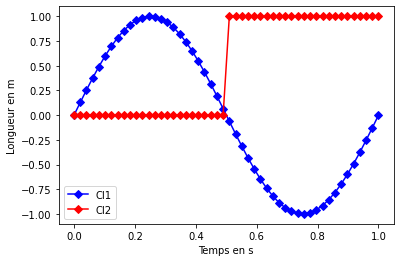

In [14]:
x = np.linspace ( 0, l, m )
CI1 = np.sin ( 2 * b * x * pi / l )
CI2 = np.where ( x < x0,0, 1 )

plt.plot(x,CI1,'b-D',label="CI1")
plt.plot(x,CI2,'r-D',label="CI2")
plt.legend()

plt.xlabel('Temps en s')
plt.ylabel('Longueur en m')

plt.show()


# Étude de l'influence de b avec CI1 et c = 0,5

In [ ]:
# Schéma FOU-EE
def fouee(cdi,a = 1,c = 0.5,l = 1, m = 50 ,b = 1 ):
    
            dx = l/m
            dt = c*dx/a
            T = l/a
            n = int(T/dt)
            u = np.zeros ( m )
            c1 = c/2
            c2 = (c**2)/2
            u = np.zeros ( m )
            unew = np.zeros ( m )
            X = np.zeros ( [ m, n + 1 ] )
            Y = np.zeros ( [ m, n + 1 ] )
            Z = np.zeros ( [ m, n + 1 ] )
            for j in range ( 0, n + 1 ):
                t = float ( j ) / float ( n )
                if ( j == 0 ):
                      unew = cdi
                else:
                  unew[0] = u[0] - c * ( u[0] - u[-1] ) 
                  for i in range ( 1, m ):
                    unew[i] = u[i] - c * ( u[i] - u[i-1] ) 


                for i in range ( m ):
                  u[i] = unew[i]
                  X[i,j] = x[i]
                  Y[i,j] = t
                  Z[i,j] = u[i]
            return X,Y,Z

b =  1


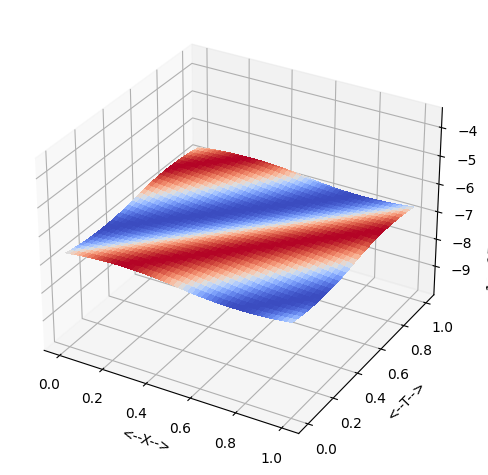

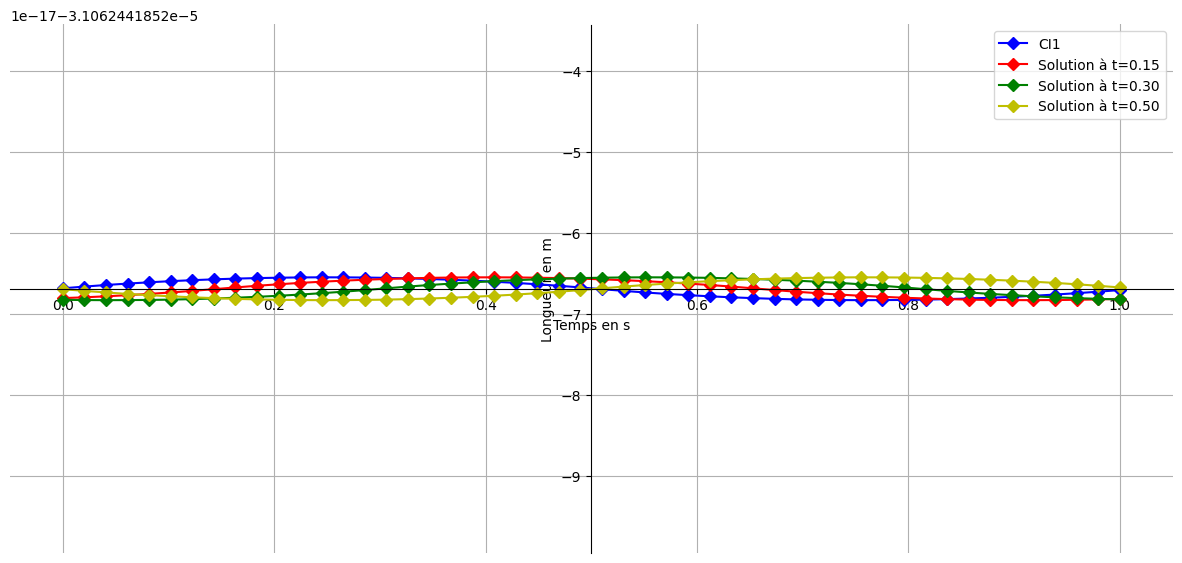

b =  2


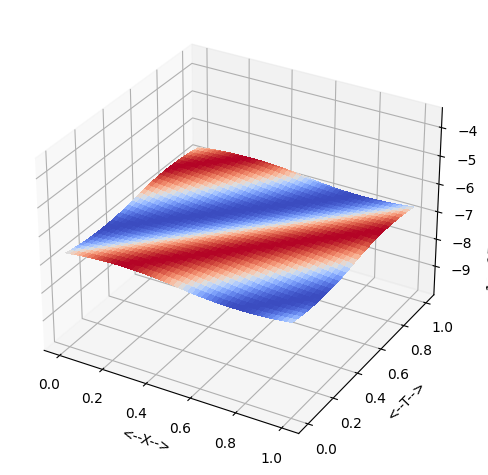

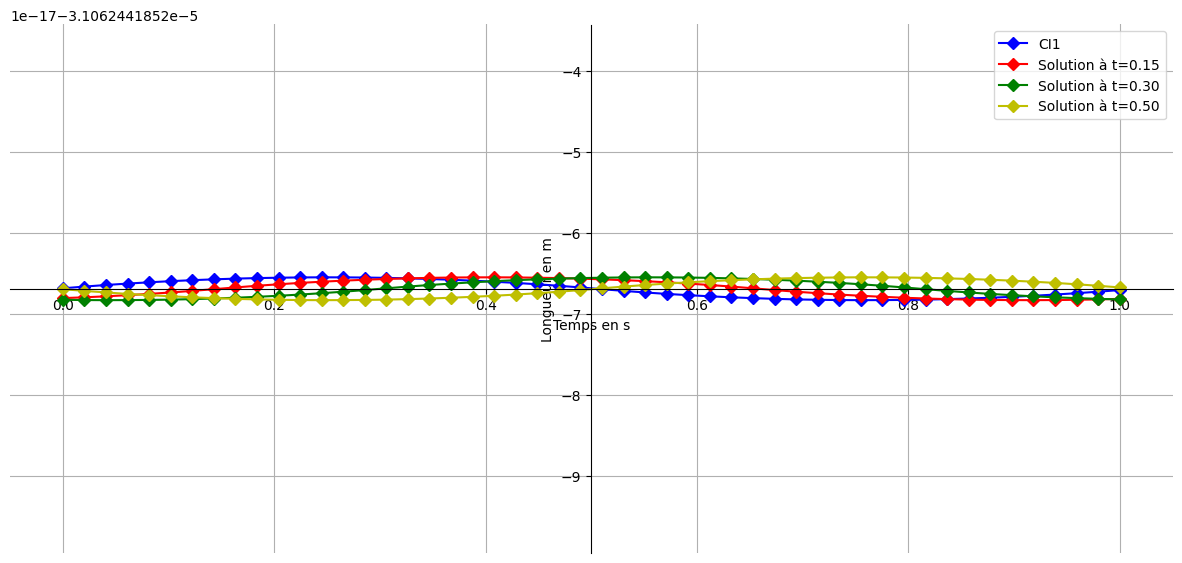

b =  4


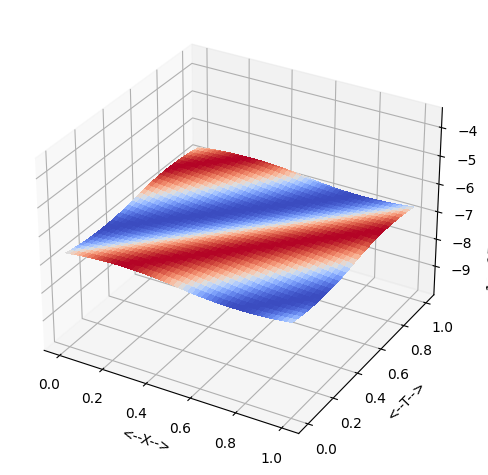

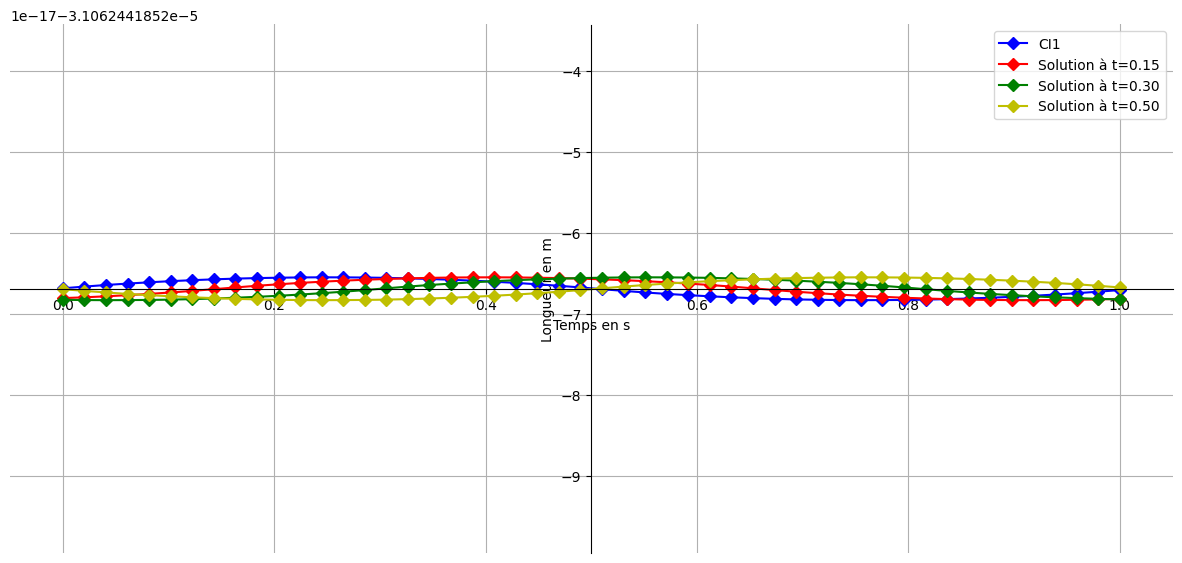

b =  8


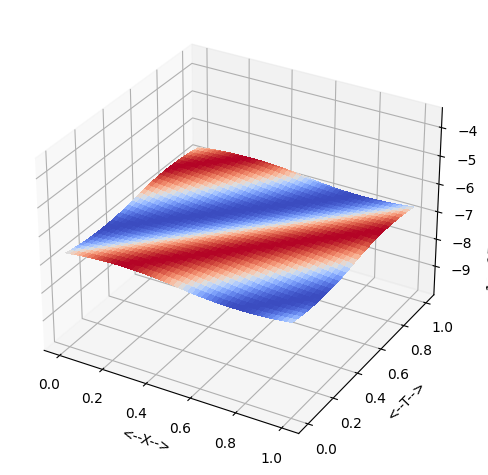

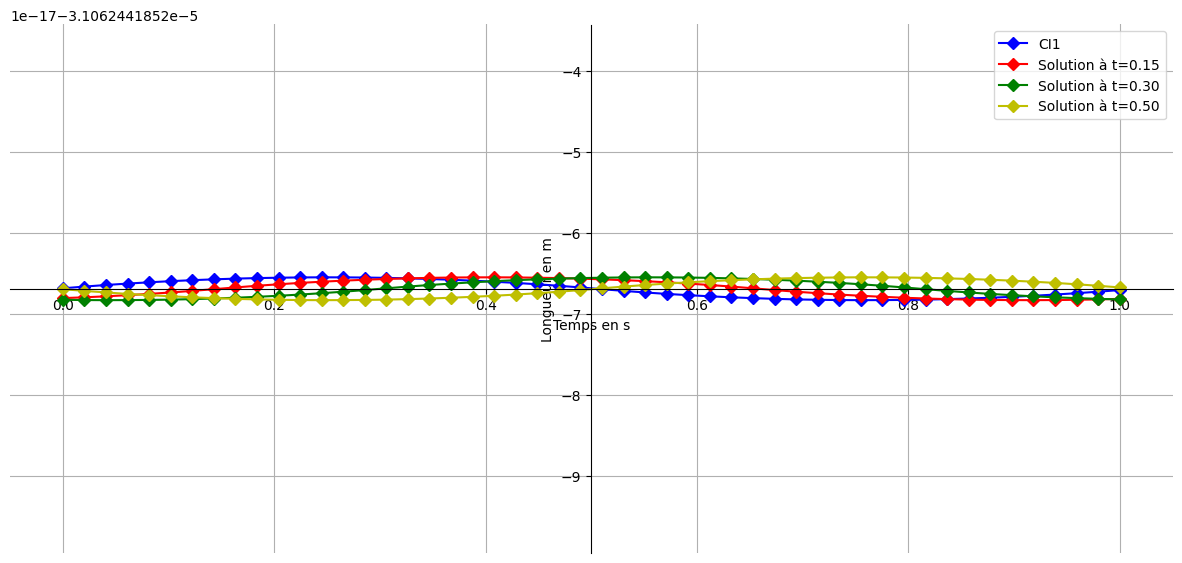

b =  16


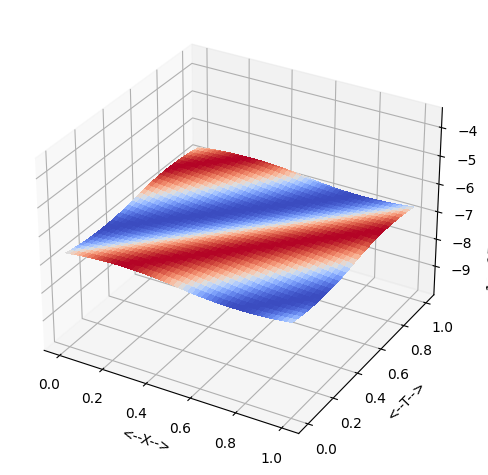

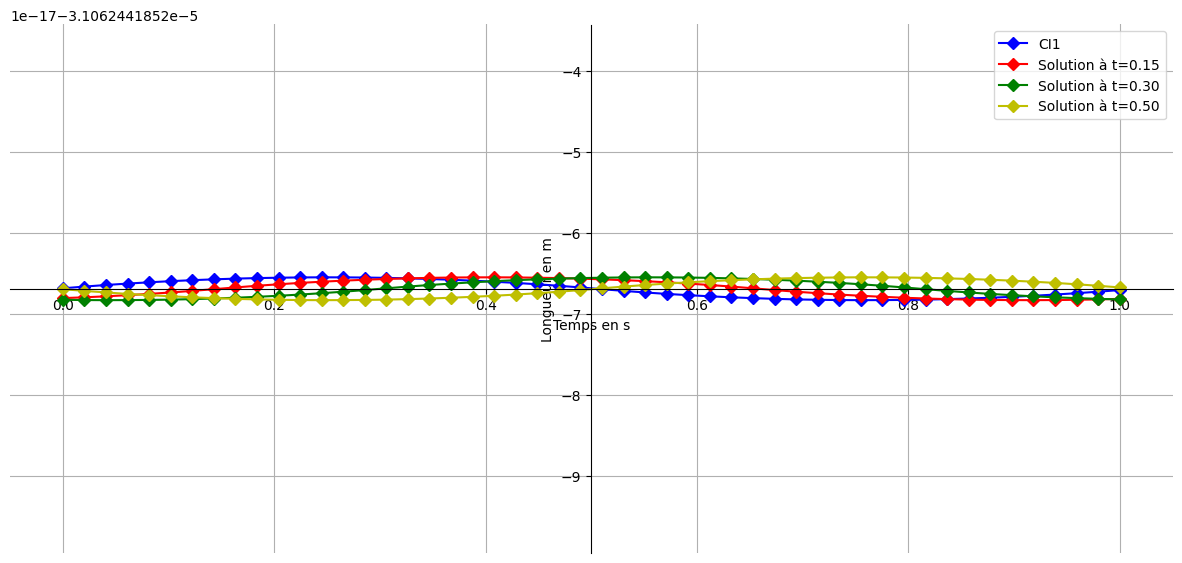

In [176]:
    for i in [1,2,4,8,16]:
        X,Y,Z= fou(CI1,b=i)
        print("b = ", i)
        fig = plt.figure(figsize=(10, 6), dpi=100)
        ax = fig.add_subplot( projection = '3d' )
        surf = ax.plot_surface ( X, Y, Z, cmap = cm.coolwarm, \
        linewidth = 0, antialiased = False )
        ax.set_xlabel ( '<--X-->' )
        ax.set_ylabel ( '<--T-->' )
        ax.grid(True)
        plt.show ( block = True )
        plt.close ( ) 
        plt.figure(figsize=(15, 7), dpi=100)
        plt.plot(x,CI1,'b-D',label="CI1" )
        plt.plot(x,Z[:,15],'r-D',label="Solution à t=0.15")
        plt.plot(x,Z[:,30],'g-D',label="Solution à t=0.30")
        plt.plot(x,Z[:,50],'y-D',label="Solution à t=0.50")
        
        plt.xlabel('Temps en s')
        plt.ylabel('Longueur en m')
        plt.grid(True)
        plt.legend()
        plt.show ()
        plt.close ( )

# Étude de l'influence de c avec CI1 et b = 1

# Étude de l'influence de c sur le schéma avec CI2

# Étude de l'influence de m sur le schéma avec CI2 et c = 0.5

b =  1


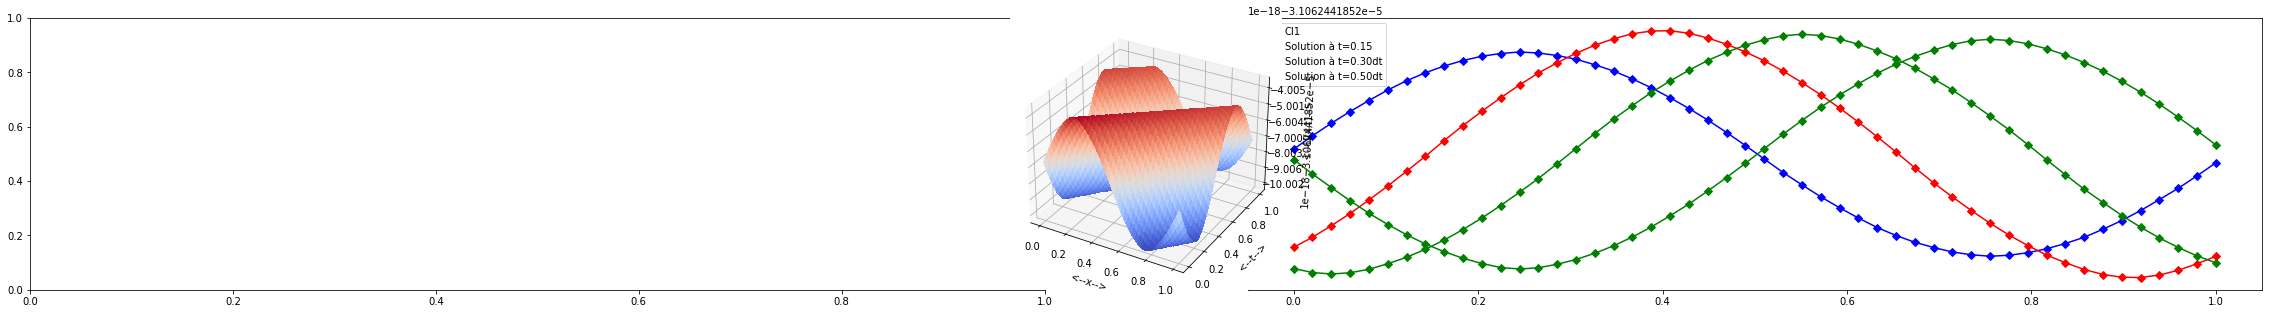

NameError: name 'FigureCanvasTkAgg' is not defined

In [108]:
import tkinter as tk

app = tk.Tk()
app.wm_title("l'influence de b ")
for i in [1,2,4,8,16]:
        X,Y,Z,n = fou(CI1,b=i)
        print("b = ", i)
        fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(40,5 ))
        
        ax[0] = fig.add_subplot(projection='3d')
        ax[0].plot_surface ( X, Y, Z, cmap = cm.coolwarm, \
                                linewidth = 0, antialiased = False )
        ax[0].set_xlabel ( '<--x-->' )
        ax[0].set_ylabel ( '<--t-->' )
        ax[0].set_zlabel ( '<--U(x,t)-->' )        
        ax[1].plot(x,CI1,'b-D',label="CI1")
        ax[1].plot(x,Z[:,15],'r-D',label="Solution à t=0.15")
        ax[1].plot(x,Z[:,30],'g-D',label="Solution à t=0.30dt")
        ax[1].plot(x,Z[:,50],'g-D',label="Solution à t=0.50dt")
        ax[1].legend()
        plt.show ( block = False )
        plt.close ( )

        graph = FigureCanvasTkAgg(fig, master=app)
        canvas = graph.get_tk_widget()
        canvas.grid(row=0, column=0)

        app.mainloop()

In [ ]:
import tkinter as tk
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
 
app = tk.Tk()
app.wm_title("l'influence de b ")
 
fig = Figure(figsize=(6, 4), dpi=96)
ax = fig.add_subplot(111)
ax.plot(range(10), [5, 4, 2, 6, 9, 8, 7, 1, 2, 3])
 
graph = FigureCanvasTkAgg(fig, master=app)
canvas = graph.get_tk_widget()
canvas.grid(row=0, column=0)
 
app.mainloop()

On véréfie très bien que les shémas donnent des solutions périodiques


In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

# Schéma FOU-EE
print("étude de l'influence de B avec CI1 et C = 0.5")
L = 1
m = 50
x = np.linspace(0, L, m)
a = 1
C = 0.5
t = L / a
dx = L / m
dt = dx * C / a
n = int(t /dt)
for B in [2,4,8,16]:
    u0 = np.sin(2*B*np.pi*x/L)
    u = u0
    fig = go.Figure(layout = go.Layout(title="B = " + str(B)))
    fig.add_trace(go.Scatter(x=x, y=u, mode='lines', name = "u0"))
    for i in range(1,n+1):
        u[1:m], u[0] = u[1:m] - C * (u[1:m] - u[:m-1]), u[0] - C * (u[0] - u[-1])
    fig.add_trace(go.Scatter(x=x, y=u, mode='lines', name = "u1"))
    fig.show()
   
# Schéma FOU-EE
print("étude de l'influence de C avec CI1 et B = 1")
L = 1
m = 50
x = np.linspace(0, L, m)
a = 1
B = 1
t = L / a
dx = L / m
for C in [0.1, 0.2, 0.4, 0.8, 1, 1.5]:
    dt = dx * C / a
    n = int(t /dt)
    u0 = np.sin(2*B*np.pi*x/L)
    u = u0
    fig = go.Figure(layout = go.Layout(title="C = " + str(C)))
    fig.add_trace(go.Scatter(x=x, y=u, mode='lines', name = "u0"))
    for i in range(1,n+1):
        u[1:m], u[0] = u[1:m] - C * (u[1:m] - u[:m-1]), u[0] - C * (u[0] - u[-1])
    fig.add_trace(go.Scatter(x=x, y=u, mode='lines', name = "u1"))
    fig.show()
   
# Schéma FOU-EE
print("Solution avec CI2 et C = 1")
L = 1
m = 50
x = np.linspace(0, L, m)
a = 1
C = 1
t = L / a
dx = L / m
dt = dx * C / a
n = int(t /dt)
x0 = 0.5
u0 = np.zeros(m)
u0[x >= x0] = 1
u = np.copy(u0)
fig = go.Figure(layout = go.Layout(title="t = T/8"))
fig.add_trace(go.Scatter(x=x, y=u0, mode='lines', name = "u0"))
for i in range(1,n//8):
    u[1:m], u[0] = u[1:m] - C * (u[1:m] - u[:m-1]), u[0] - C * (u[0] - u[-1])
fig.add_trace(go.Scatter(x=x, y=u, mode='lines', name = "uT/8"))
fig.show()

fig = go.Figure(layout = go.Layout(title="t = T/4"))
fig.add_trace(go.Scatter(x=x, y=u0, mode='lines', name = "u0"))
for i in range(n//8,n//4):
    u[1:m], u[0] = u[1:m] - C * (u[1:m] - u[:m-1]), u[0] - C * (u[0] - u[-1])
fig.add_trace(go.Scatter(x=x, y=u, mode='lines', name = "uT/4"))
fig.show()

fig = go.Figure(layout = go.Layout(title="t = T/2"))
fig.add_trace(go.Scatter(x=x, y=u0, mode='lines', name = "u0"))
for i in range(n//4,n//2):
    u[1:m], u[0] = u[1:m] - C * (u[1:m] - u[:m-1]), u[0] - C * (u[0] - u[-1])
fig.add_trace(go.Scatter(x=x, y=u, mode='lines', name = "uT/2"))
fig.show()

fig = go.Figure(layout = go.Layout(title="t = T"))
fig.add_trace(go.Scatter(x=x, y=u0, mode='lines', name = "u0"))
for i in range(n//2,n+1):
    u[1:m], u[0] = u[1:m] - C * (u[1:m] - u[:m-1]), u[0] - C * (u[0] - u[-1])
fig.add_trace(go.Scatter(x=x, y=u, mode='lines', name = "uT"))
fig.show()

# Schéma FOU-EE
print("étude de l'influence de C sur le schéma avec CI2")
L = 1
m = 50
x = np.linspace(0, L, m)
a = 1
t = L / a
dx = L / m
x0 = 0.5
u0 = np.zeros(m)
u0[x >= x0] = 1
for C in [0.1, 0.2, 0.4, 0.8, 1, 1.5]:
    u = np.copy(u0)
    dt = dx * C / a
    n = int(t /dt)
    fig = go.Figure(layout = go.Layout(title="C = " + str(C)))
    fig.add_trace(go.Scatter(x=x, y=u0, mode='lines', name = "u0"))
    for i in range(1,n+1):
        u[1:m], u[0] = u[1:m] - C * (u[1:m] - u[:m-1]), u[0] - C * (u[0] - u[-1])
    fig.add_trace(go.Scatter(x=x, y=u, mode='lines', name = "u1"))
    fig.show()

# Schéma FOU-EE
print("étude de l'influence de m sur le schéma avec CI2 et C = 0.5")
a = 1
C = 0.5
t = L / a
x0 = 0.5
for m in [4, 10, 20, 50, 100, 200]:
    x = np.linspace(0, L, m)
    dx = L / m
    u0 = np.zeros(m)
    u0[x >= x0] = 1
    u = np.copy(u0)
    dt = dx * C / a
    n = int(t /dt)
    fig = go.Figure(layout = go.Layout(title="m = " + str(m)))
    fig.add_trace(go.Scatter(x=x, y=u0, mode='lines', name = "u0"))
    for i in range(1,n+1):
        u[1:m], u[0] = u[1:m] - C * (u[1:m] - u[:m-1]), u[0] - C * (u[0] - u[-1])
    fig.add_trace(go.Scatter(x=x, y=u, mode='lines', name = "u1"))
    fig.show()

In [ ]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d.axes3d import get_test_data
import numpy as np
a = 1
c = 0,5
l = 1
m = 50
b = 1 
x0 = 0.5

x = np.linspace(0,l,m)
cdi1 = np.sin(2*b*x*pi/l)
cdi2 = np.where(x < x0,0, 1)

plot(x,cdi1,'b-D',label="CI1")
plot(x,cdi2,'r-D',label="CI2")
plt.legend()

plt.show()


    def fof( ):
        for j in range ( 0, n + 1 ):

            t = float ( j ) / float ( nt )
            if ( j == 0 ):
                  unew = cdi
            else:

              for i in range ( 0, m-1 ):
                unew[i] = u[i] - c * ( u[i+1] - u[i] ) 

              unew[m-1] = u[m-1] - c * ( u[0] - u[m-1] ) 

            for i in range ( 0, nx ):
              u[i] = unew[i]
              X[i,j] = x[i]
              Y[i,j] = t
              Z[i,j] = u[i]
          fig = plt.figure ( )
          ax = fig.gca ( projection = '3d' )
          surf = ax.plot_surface ( X, Y, Z, cmap = cm.coolwarm, \
           linewidth = 0, antialiased = False )
          ax.set_xlabel ( '<--X-->' )
          ax.set_ylabel ( '<--T-->' )
          ax.set_zlabel ( '<--U(X,T)-->' )
          fig.colorbar ( surf, shrink = 0.5, aspect = 10 )
          filename = 'fd1d_advection_lax_wendroff.png'
          plt.savefig ( filename )
          plt.show ( block = False )
          plt.close ( )
    def soc () :
        for j in range ( 0, n + 1 ):

            t = float ( j ) / float ( nt )
            if ( j == 0 ):
                  unew = cdi
            else:
              unew[0] = u[0] - c1 * ( u[1] - u[m-1] ) 
              for i in range ( 1, m - 1 ):
                unew[i] = u[i] - c1 * ( u[i+1] - u[i-1] ) 
              unew[m-1] = u[m-1] - c1 * ( u[0] - u[m-2] )
            for i in range ( 0, nx ):
              u[i] = unew[i]
              X[i,j] = x[i]
              Y[i,j] = t
              Z[i,j] = u[i]
          fig = plt.figure ( )
          ax = fig.gca ( projection = '3d' )
          surf = ax.plot_surface ( X, Y, Z, cmap = cm.coolwarm, \
          linewidth = 0, antialiased = False )
          ax.set_xlabel ( '<--X-->' )
          ax.set_ylabel ( '<--T-->' )
          ax.set_zlabel ( '<--U(X,T)-->' )
          fig.colorbar ( surf, shrink = 0.5, aspect = 10 )
          filename = 'fd1d_advection_lax_wendroff.png'
          plt.savefig ( filename )
          plt.show ( block = False )
          plt.close ( )
        return

        plot(x,cdi1,'b-D',label="CI1")
        plot(x,cdi2,'r-D',label="CI2")
        plt.legend()

        plt.show()

    def lax():
        for j in range ( 0, n + 1 ):

            t = float ( j ) / float ( nt )
            if ( j == 0 ):
                  unew = cdi
            else:
              unew[0] = u[0] - c1 * ( u[1] - u[m-1] ) + c2 * ( u[1] - 2.0 * u[0] + u[m-1] )
              for i in range ( 1, m - 1 ):
                unew[i] = u[i] - c1 * ( u[i+1] - u[i-1] ) 
                               + c2 * ( u[i+1] - 2.0 * u[i] + u[i-1] )
              unew[m-1] = u[m-1] - c1 * ( u[0] - u[m-2] ) 
                                   + c2 * ( u[0] - 2.0 * u[m-1] + u[m-2] )

            for i in range ( 0, nx ):
              u[i] = unew[i]
              X[i,j] = x[i]
              Y[i,j] = t
              Z[i,j] = u[i]
        return X,Y,Z,n
    